In [8]:
import requests
from bs4 import BeautifulSoup
import codecs
import time

In [920]:
# Drom.ru

In [3]:
session = requests.Session()
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 5.1; rv:47.0) Gecko/20100101 Firefox/47.0',
           'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'
    }
base_url = 'https://www.drom.ru/catalog/bmw/'

domain = 'https://www.drom.ru'

In [919]:
obs = []
urls = []
urls.append(base_url)
req = session.get(base_url, headers=headers)

In [16]:
for url in urls:
    time.sleep(5)
    req = session.get(url, headers=headers)
    if req.status_code == 200:
        soup = BeautifulSoup(req.text, "html.parser")        
       
        
        # Получаем часть html-код страницы, где находятся нужные нам ссылки  
        series_list = soup.find('div', class_='b-selectCars__section') 
        
        # Теперь возьмем оттуда все нужные ссылки
        a_list = series_list.find_all('a', attrs={'class': 'b-link'})
        
        # И вытащим с них название серии и ссылку        
        a_series_dict = {}
        
        for a in a_list:
            a_series_dict.update({a.text.strip(): a.get('href')}) # Первый элемент - название, второй - ссылка.
            
print(a_series_dict)

{'02 (E10)': '/catalog/bmw/02_e10/', '1-Series': '/catalog/bmw/1-series/', '1M': '/catalog/bmw/1m/', '2-Series': '/catalog/bmw/2-series/', '2-Series Active Tourer': '/catalog/bmw/2-series_active_tourer/', '2-Series Gran Tourer': '/catalog/bmw/2-series_gran_tourer/', '3-Series': '/catalog/bmw/3-series/', '3-Series Gran Turismo': '/catalog/bmw/3-series_gran_turismo/', '321': '/catalog/bmw/321/', '326': '/catalog/bmw/326/', '340': '/catalog/bmw/340/', '4-Series': '/catalog/bmw/4-series/', '5-Series': '/catalog/bmw/5-series/', '5-Series Gran Turismo': '/catalog/bmw/5-series_gran_turismo/', '6-Series': '/catalog/bmw/6-series/', '6-Series Gran Turismo': '/catalog/bmw/6-series_gran_turismo/', '7-Series': '/catalog/bmw/7-series/', '8-Series': '/catalog/bmw/8-series/', 'E3': '/catalog/bmw/e3/', 'E9': '/catalog/bmw/e9/', 'i3': '/catalog/bmw/i3/', 'i8': '/catalog/bmw/i8/', 'M2': '/catalog/bmw/m2/', 'M3': '/catalog/bmw/m3/', 'M4': '/catalog/bmw/m4/', 'M5': '/catalog/bmw/m5/', 'M6': '/catalog/bmw/m

In [ ]:
from urllib.parse import urlunsplit, urlencode
import pandas as pd
import numpy as np
import openpyxl
from openpyxl.workbook.child import INVALID_TITLE_REGEX
import re

In [217]:
def parse_dimensions(url):
    end_url = 'specs/dimensions/'

    full_url = domain + url + end_url
    
    print(full_url)
    
    time.sleep(15)    
  
    response = requests.get(full_url, headers=headers) 
    
    if response.status_code == 200:
        
        page = BeautifulSoup(response.text, "html.parser")
        
        main_div = page.find('div', class_='b-media-cont b-media-cont_padding_b-no b-media-cont_no-margin')        
       
        inside_div = main_div.find_all('div', class_='b-media-cont')
        
        series = main_div.find_all('h3')
        
        tables = main_div.find_all('table')
        
        print('Количество вариантов: ',len(inside_div))
        
        for i in range(len(inside_div)):
       
            df = pd.read_html(str(tables[i]), header=None)[0]
            df.columns = ['page_title','dimensions','weight']
            df = df.drop([0])
            name = series[i].text
            name_exl = re.sub(INVALID_TITLE_REGEX, '_', f'{name}') # решение проблемы с тем, чтобы нормально записывалось название автомобиля в лист экселя, так как местами есть символы, которые нельзя записать, и из-за этого возникает ошибка
            df['series'] = name_exl

            
            with pd.ExcelWriter('output/df_cars.xlsx', mode='a', engine="openpyxl") as writer: # mode='a' - дописать в файл, но без , engine="openpyxl" не захотело работать 
                df.to_excel(writer, sheet_name=f'{name_exl[12:]}') # добавлю название ячейки, чтобы потом удалить европу и сша. придется руками пока что.
            
    else:
        print('Page don\'t answer!')


In [218]:
for series, url in a_series_dict.items():
    parse_dimensions(url)

https://www.drom.ru/catalog/bmw/02_e10/specs/dimensions/
Количество вариантов:  3
https://www.drom.ru/catalog/bmw/1-series/specs/dimensions/
Количество вариантов:  11
https://www.drom.ru/catalog/bmw/1m/specs/dimensions/
Количество вариантов:  1
https://www.drom.ru/catalog/bmw/2-series/specs/dimensions/
Количество вариантов:  3
https://www.drom.ru/catalog/bmw/2-series_active_tourer/specs/dimensions/
Количество вариантов:  2
https://www.drom.ru/catalog/bmw/2-series_gran_tourer/specs/dimensions/
Количество вариантов:  2
https://www.drom.ru/catalog/bmw/3-series/specs/dimensions/
Количество вариантов:  19
https://www.drom.ru/catalog/bmw/3-series_gran_turismo/specs/dimensions/
Количество вариантов:  2
https://www.drom.ru/catalog/bmw/321/specs/dimensions/
Количество вариантов:  2
https://www.drom.ru/catalog/bmw/326/specs/dimensions/
Количество вариантов:  2
https://www.drom.ru/catalog/bmw/340/specs/dimensions/
Количество вариантов:  1
https://www.drom.ru/catalog/bmw/4-series/specs/dimensions/

In [921]:
# drivernotes.net - более полная база характеристик автомобилей

In [1057]:
import random
# Попробую еще рандомайзер хедеров
def GET_UA():
    uastrings = ["Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.111 Safari/537.36",\
                "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/28.0.1500.72 Safari/537.36",\
                "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10) AppleWebKit/600.1.25 (KHTML, like Gecko) Version/8.0 Safari/600.1.25",\
                "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:33.0) Gecko/20100101 Firefox/33.0",\
                "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.111 Safari/537.36",\
                "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.111 Safari/537.36",\
                "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit/600.1.17 (KHTML, like Gecko) Version/7.1 Safari/537.85.10",\
                "Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko",\
                "Mozilla/5.0 (Windows NT 6.3; WOW64; rv:33.0) Gecko/20100101 Firefox/33.0",\
                "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/38.0.2125.104 Safari/537.36"\
                ]
 
    return random.choice(uastrings)

In [1058]:
session = requests.Session()
headers = {'User-Agent': GET_UA()}
base_url = 'http://www.drivernotes.net/tehnicheskie_harakteristiki/bmw/'

domain = 'http://www.drivernotes.net'

In [1067]:
# drivernotes_cat_urls = ['1_seriya', \
#                         '1m', '2_seriya', \
#                         '2_seriya_active_tourer', \
#                         '3_seriya', \
#                         '4_seriya', \
#                         '5_seriya', \
#                         '6_seriya', \
#                         '7_seriya', \
#                         '8_seriya', \
#                         'i3', \
#                         'i8', \
#                         'm1', \
#                         'm3', \
#                         'm4', \
#                         'm5', \
#                         'm6', \
#                         'x1', \
#                         'x3', \
#                         'x4', \
#                         'x5', \
#                         'x5_m', \
#                         'x6', \
#                         'x6_m', \
#                         'z1', \
#                         'z3', \
#                         'z3_m', \
#                         'z4', \
#                         'z4_m', \
#                         'z8'                      
#                        ]


drivernotes_cat_urls = ['z4', \
                        'z4_m', \
                        'z8'                      
                       ]

req = session.get(base_url, headers=headers)

In [1078]:
# Вспомогательная функция для добавления DataFrame в существующий файл Excel:
def append_df_to_excel(filename, df, sheet_name='Sheet1', startrow=None,
                       truncate_sheet=False, 
                       **to_excel_kwargs):
    """
    Append a DataFrame [df] to existing Excel file [filename]
    into [sheet_name] Sheet.
    If [filename] doesn't exist, then this function will create it.

    Parameters:
      filename : File path or existing ExcelWriter
                 (Example: '/path/to/file.xlsx')
      df : dataframe to save to workbook
      sheet_name : Name of sheet which will contain DataFrame.
                   (default: 'Sheet1')
      startrow : upper left cell row to dump data frame.
                 Per default (startrow=None) calculate the last row
                 in the existing DF and write to the next row...
      truncate_sheet : truncate (remove and recreate) [sheet_name]
                       before writing DataFrame to Excel file
      to_excel_kwargs : arguments which will be passed to 'DataFrame.to_excel()'
                        [can be dictionary]

    Returns: None
    """
    from openpyxl import load_workbook

    import pandas as pd

    # ignore [engine] parameter if it was passed
    if 'engine' in to_excel_kwargs:
        to_excel_kwargs.pop('engine')

    writer = pd.ExcelWriter(filename, engine='openpyxl')

    # Python 2.x: define [FileNotFoundError] exception if it doesn't exist 
    try:
        FileNotFoundError
    except NameError:
        FileNotFoundError = IOError


    try:
        # try to open an existing workbook
        writer.book = load_workbook(filename)

        # get the last row in the existing Excel sheet
        # if it was not specified explicitly
        if startrow is None and sheet_name in writer.book.sheetnames:
            startrow = writer.book[sheet_name].max_row

        # truncate sheet
        if truncate_sheet and sheet_name in writer.book.sheetnames:
            # index of [sheet_name] sheet
            idx = writer.book.sheetnames.index(sheet_name)
            # remove [sheet_name]
            writer.book.remove(writer.book.worksheets[idx])
            # create an empty sheet [sheet_name] using old index
            writer.book.create_sheet(sheet_name, idx)

        # copy existing sheets
        writer.sheets = {ws.title:ws for ws in writer.book.worksheets}
    except FileNotFoundError:
        # file does not exist yet, we will create it
        pass

    if startrow is None:
        startrow = 0

    # write out the new sheet
    df.to_excel(writer, sheet_name, startrow=None, **to_excel_kwargs, header=None, index=False)

    # save the workbook
    writer.save()

In [1081]:
from random import randint
from time import sleep
import openpyxl
from openpyxl.workbook.child import INVALID_TITLE_REGEX
import re

# Функция вытаскивает все ссылки на автомобили указанной категории
def parse_links_from_drivernotes(cat_url):

    cat_url = base_url + cat_url
    
    print(cat_url)
    
#     name_list = []    
  
    sleep(randint(3,5)) 
  
    response_cat = requests.get(cat_url, headers={'User-Agent': GET_UA()}) 
    
    if response_cat.status_code == 200:
        
        soup_cat = BeautifulSoup(response_cat.text, 'html.parser')  
        
        # просто получаю все ссылки в таблицах, которые содержат тег (это все, где есть ссылки на автомобили)
        links = [a['href'] for a in soup_cat.select('.new-table a[href]')]
#         print(links)

        for link in links:
            
            page_url = domain + link            
       
            response_page = requests.get(page_url, headers={'User-Agent': GET_UA()})
            
            sleep(randint(3,5))  
            
            if response_page.status_code == 200:
                print('The page is responding')
                print(page_url)
                
                soup_page = BeautifulSoup(response_page.text, 'html.parser')
                

                # получаю заголовок страницы
                for h1 in soup_page.find_all('h1'):
                    print(h1.text)   
                
                data = {}
                
                # пройдусь по таблице и вытащу нужные мне данные в словарь
                for tab in soup_page.find_all('table'):
                    for row in tab.find_all('tr'):
                        tmp = row.find_all('td')
                        if len(tmp) == 2:
                            data[re.sub(r'\s{3,}', '', tmp[0].text.strip())] = \
                                re.sub(r'\s{3,}', '', tmp[1].text.strip())
                            
                # пройдусь по данному словарю и возьму те значения, которые мне нужны                
                items_dict = {}
                
                for key, value in data.items():
                    if key == 'Длина' \
                    or key == 'Ширина' \
                    or key == 'Высота' \
                    or key == 'Снаряженная масса' \
                    or key == 'Колёсная база' \
                    or key == 'Количество цилиндров' \
                    or key == 'Время разгона до 100 км/ч' \
                    or key == 'Грузоподъёмность':
                        
                        items_dict[key] = value                      

                # так как на каждой странице данные расположены в своем порядке, то в итоге получаю для каждой страницы
                # свой словарь - нельзя унифицировать dataframe. поэтому превращаю неотсортированный словарь в отсортированный
                sorted_dict = dict(sorted(items_dict.items()))
                
                # Добавлю в словарь название автомобиля, который парсим, и сделаю вложенный словарь, чтобы потом создать датафрейм
                name = re.sub(INVALID_TITLE_REGEX, '_', f'{h1.text[39:]}') # решение проблемы с тем, чтобы нормально записывалось название автомобиля в лист экселя, так как местами есть символы, которые нельзя записать, и из-за этого возникает ошибка
                
                tmp_dist = {name: sorted_dict}
                ready_dist = tmp_dist.items()

                # создаю датафрейм из вложенного словаря
                df = pd.DataFrame.from_dict(ready_dist, orient='columns')
                
                # раскладываю вложенный словарь по отдельным колонкам
                df['acceleration_time_to_100_km_h'] = (df[1]
                     .apply(lambda x: x.get('Время разгона до 100 км/ч') 
                                      if isinstance(x, dict) 
                                      else np.nan))
                df['dimensions_height'] = (df[1]
                     .apply(lambda x: x.get('Высота') 
                                      if isinstance(x, dict) 
                                      else np.nan))
                df['payload'] = (df[1]
                     .apply(lambda x: x.get('Грузоподъёмность') 
                                      if isinstance(x, dict) 
                                      else np.nan))
                df['dimensions_length'] = (df[1]
                     .apply(lambda x: x.get('Длина') 
                                      if isinstance(x, dict) 
                                      else np.nan))
                df['number_of_cylinders'] = (df[1]
                     .apply(lambda x: x.get('Количество цилиндров') 
                                      if isinstance(x, dict) 
                                      else np.nan))
                df['wheelbase'] = (df[1]
                     .apply(lambda x: x.get('Колёсная база') 
                                      if isinstance(x, dict) 
                                      else np.nan))
                df['curb_weight'] = (df[1]
                     .apply(lambda x: x.get('Снаряженная масса') 
                                      if isinstance(x, dict) 
                                      else np.nan))
                df['dimensions_width'] = (df[1]
                     .apply(lambda x: x.get('Ширина') 
                                      if isinstance(x, dict) 
                                      else np.nan))
                
                # удаляю ненужную уже колонку, где был вложенный словарь
                df.drop([1], axis=1, inplace=True,)
                
                # переименую первую колонку в название автомобиля
                df.rename(columns={0: 'name'}, inplace=True)                

#                 display(df)


                # используя функцию допишу датафрейм в уже существующий файл экселя в тот же лист
                append_df_to_excel('output/drivernotes_cars_tehnicheskie_harakteristiki3.xlsx', df)
                
#                 with pd.ExcelWriter('output/drivernotes_cars_tehnicheskie_harakteristiki2.xlsx', mode='a', engine="openpyxl") as writer: # mode='a' - дописать в файл, но без , engine="openpyxl" не захотело работать 
#                     df.to_excel(writer, sheet_name=f'{name}') # добавлю название ячейки, чтобы потом удалить европу и сша. придется руками пока что.
                    
                
            else:
                print('The page is not responding')
                print(page_url)               

        
            
    else:
        print('The cat is not responding')


In [1082]:
for cat_url in drivernotes_cat_urls:
    parse_links_from_drivernotes(cat_url)

http://www.drivernotes.net/tehnicheskie_harakteristiki/bmw/z4
The page is responding
http://www.drivernotes.net/tehnicheskie_harakteristiki/bmw/z4/2.2i_AT_(170_л._с.)-4649
Технические характеристики BMW Z4 (БМВ З4) 2.2i AT 2002-2005


TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

Наша программа собрала все данные в один файл xls, но в разные листы. Теперь соединю эти данные в один датасет.

In [815]:
sheet_to_df_map = pd.read_excel('output/df_cars_dimensions.xlsx', sheet_name=None)
mdf = pd.concat(sheet_to_df_map, axis=0, ignore_index=True)

In [220]:
mdf

,Unnamed: 0,name,dimensions,weight,series
0,1,1.6 MT 1602,4110 x 1590 x 1380,940,"Размеры BMW 02 (E10) 1971, хэтчбек 3 дв., 1 по..."
1,2,1.6 MT 1600 ti,4110 x 1590 x 1380,962,"Размеры BMW 02 (E10) 1971, хэтчбек 3 дв., 1 по..."
2,3,1.8 MT 1802,4110 x 1590 x 1380,970,"Размеры BMW 02 (E10) 1971, хэтчбек 3 дв., 1 по..."
3,4,1.8 AT 1802,4110 x 1590 x 1380,970,"Размеры BMW 02 (E10) 1971, хэтчбек 3 дв., 1 по..."
4,5,2.0 MT 2002 ti,4110 x 1590 x 1380,990,"Размеры BMW 02 (E10) 1971, хэтчбек 3 дв., 1 по..."
...,...,...,...,...,...
1584,3,3.2i M MT,4113 x 1781 x 1271,1495,"Размеры BMW Z4 рестайлинг 2006, купе, 1 поколе..."
1585,1,2.0i MT,4091 x 1781 x 1299,1295,"Размеры BMW Z4 2002, открытый кузов, 1 поколен..."
1586,2,2.5i MT,4091 x 1781 x 1299,1335,"Размеры BMW Z4 2002, открытый кузов, 1 поколен..."
1587,3,3.0i MT,4091 x 1781 x 1299,1365,"Размеры BMW Z4 2002, открытый кузов, 1 поколен..."


In [816]:
mdf.drop(['Unnamed: 0'], axis=1, inplace=True,)

In [176]:
mdf

,name,dimensions,weight,series
0,2.0 MT 2002 turbo,4220 x 1620 x 1410,1080,"Размеры BMW 02 (E10) 1966, купе, 1 поколение, E10"
1,1.6 MT 1602,4230 x 1590 x 1410,940,"Размеры BMW 02 (E10) 1966, купе, 1 поколение, E10"
2,1.6 MT 1600 ti,4230 x 1590 x 1410,962,"Размеры BMW 02 (E10) 1966, купе, 1 поколение, E10"
3,1.8 MT 1802,4230 x 1590 x 1410,970,"Размеры BMW 02 (E10) 1966, купе, 1 поколение, E10"
4,1.8 AT 1802,4230 x 1590 x 1410,970,"Размеры BMW 02 (E10) 1966, купе, 1 поколение, E10"
...,...,...,...,...
1594,3.2i M MT,4113 x 1781 x 1271,1495,"Размеры BMW Z4 рестайлинг 2006, купе, 1 поколе..."
1595,2.0i MT,4091 x 1781 x 1299,1295,"Размеры BMW Z4 2002, открытый кузов, 1 поколен..."
1596,2.5i MT,4091 x 1781 x 1299,1335,"Размеры BMW Z4 2002, открытый кузов, 1 поколен..."
1597,3.0i MT,4091 x 1781 x 1299,1365,"Размеры BMW Z4 2002, открытый кузов, 1 поколен..."


In [817]:
mdf_dimensions_tmp = mdf['dimensions'].str.split("x", expand = True).astype(int)

In [180]:
mdf_dimensions_tmp

,0,1,2
0,4220,1620,1410
1,4230,1590,1410
2,4230,1590,1410
3,4230,1590,1410
4,4230,1590,1410
...,...,...,...
1594,4113,1781,1271
1595,4091,1781,1299
1596,4091,1781,1299
1597,4091,1781,1299


In [818]:
mdf_dimensions_tmp.columns = ['dimensions_length','dimensions_width','dimensions_height']

In [182]:
mdf_dimensions_tmp

,dimensions_length,dimensions_width,dimensions_height
0,4220,1620,1410
1,4230,1590,1410
2,4230,1590,1410
3,4230,1590,1410
4,4230,1590,1410
...,...,...,...
1594,4113,1781,1271
1595,4091,1781,1299
1596,4091,1781,1299
1597,4091,1781,1299


In [819]:
result = pd.concat([mdf, mdf_dimensions_tmp], axis=1, sort=False)

In [820]:
result.drop(['dimensions'], axis=1, inplace=True,)

In [661]:
result

,name,weight,series,dimensions_length,dimensions_width,dimensions_height
0,1.6 MT 1602,940,"Размеры BMW 02 (E10) 1971, хэтчбек 3 дв., 1 по...",4110,1590,1380
1,1.6 MT 1600 ti,962,"Размеры BMW 02 (E10) 1971, хэтчбек 3 дв., 1 по...",4110,1590,1380
2,1.8 MT 1802,970,"Размеры BMW 02 (E10) 1971, хэтчбек 3 дв., 1 по...",4110,1590,1380
3,1.8 AT 1802,970,"Размеры BMW 02 (E10) 1971, хэтчбек 3 дв., 1 по...",4110,1590,1380
4,2.0 MT 2002 ti,990,"Размеры BMW 02 (E10) 1971, хэтчбек 3 дв., 1 по...",4110,1590,1380
...,...,...,...,...,...,...
1584,3.2i M MT,1495,"Размеры BMW Z4 рестайлинг 2006, купе, 1 поколе...",4113,1781,1271
1585,2.0i MT,1295,"Размеры BMW Z4 2002, открытый кузов, 1 поколен...",4091,1781,1299
1586,2.5i MT,1335,"Размеры BMW Z4 2002, открытый кузов, 1 поколен...",4091,1781,1299
1587,3.0i MT,1365,"Размеры BMW Z4 2002, открытый кузов, 1 поколен...",4091,1781,1299


In [821]:
result.rename(columns={'series': 'page_title'}, inplace=True)

In [822]:
result['model_date_begin'] = result['page_title']

In [261]:
def get_model_date_begin(model_date_begin): 
    regex_num = re.compile('\d{4}')
    
    model_date_begin = regex_num.findall(model_date_begin)  
    return model_date_begin

In [823]:
result['model_date_begin'] = result['model_date_begin'].apply(lambda x: get_model_date_begin(x))

In [824]:
result['model_date_begin'] = result['model_date_begin'].astype(str)

In [825]:
result['model_date_begin'] = result.model_date_begin.apply(lambda x: x.replace('[\'', '').replace('\']', ''))

In [281]:
result

,name,weight,page_title,dimensions_length,dimensions_width,dimensions_height,model_date_begin
0,1.6 MT 1602,940,"02 (E10) 1971, хэтчбек 3 дв., 1 поколение, E6",4110,1590,1380,1971
1,1.6 MT 1600 ti,962,"02 (E10) 1971, хэтчбек 3 дв., 1 поколение, E6",4110,1590,1380,1971
2,1.8 MT 1802,970,"02 (E10) 1971, хэтчбек 3 дв., 1 поколение, E6",4110,1590,1380,1971
3,1.8 AT 1802,970,"02 (E10) 1971, хэтчбек 3 дв., 1 поколение, E6",4110,1590,1380,1971
4,2.0 MT 2002 ti,990,"02 (E10) 1971, хэтчбек 3 дв., 1 поколение, E6",4110,1590,1380,1971
...,...,...,...,...,...,...,...
1584,3.2i M MT,1495,"Z4 рестайлинг 2006, купе, 1 поколение, E85",4113,1781,1271,2006
1585,2.0i MT,1295,"Z4 2002, открытый кузов, 1 поколение, E85",4091,1781,1299,2002
1586,2.5i MT,1335,"Z4 2002, открытый кузов, 1 поколение, E85",4091,1781,1299,2002
1587,3.0i MT,1365,"Z4 2002, открытый кузов, 1 поколение, E85",4091,1781,1299,2002


In [826]:
result['page_title'] = result['page_title'].map(lambda x: str(x)[12:])

In [827]:
result['body_type'] = result['page_title']

In [328]:
def make_body_type(body_type):
    if 'открытый кузов' in body_type:
        body_type = 'cabriolet'
        
    elif 'хэтчбек' in body_type:
        body_type = 'hatchback'
        
    elif 'универсал' in body_type:
        body_type = 'station_wagon'
        
    elif 'купе' in body_type:
        body_type = 'coupe'
        
    elif 'седан' in body_type:
        body_type = 'sedan'
        
    elif 'лифтбек' in body_type:
        body_type = 'liftback'
        
    elif 'джип_suv' in body_type:
        body_type = 'allroad'
        
    elif 'минивэн' in body_type:
        body_type = 'compact_van'
    

                    
    return (body_type)

In [828]:
result['body_type'] = result['body_type'].apply(lambda x: make_body_type(str(x)))

In [334]:
result

,name,weight,page_title,dimensions_length,dimensions_width,dimensions_height,model_date_begin,body_type
0,1.6 1602,940,"02 (E10) 1971, хэтчбек 3 дв., 1 поколение, E6",4110,1590,1380,1971,hatchback
1,1.6 1600 ti,962,"02 (E10) 1971, хэтчбек 3 дв., 1 поколение, E6",4110,1590,1380,1971,hatchback
2,1.8 1802,970,"02 (E10) 1971, хэтчбек 3 дв., 1 поколение, E6",4110,1590,1380,1971,hatchback
3,1.8 1802,970,"02 (E10) 1971, хэтчбек 3 дв., 1 поколение, E6",4110,1590,1380,1971,hatchback
4,2.0 2002 ti,990,"02 (E10) 1971, хэтчбек 3 дв., 1 поколение, E6",4110,1590,1380,1971,hatchback
...,...,...,...,...,...,...,...,...
1584,3.2i M,1495,"Z4 рестайлинг 2006, купе, 1 поколение, E85",4113,1781,1271,2006,coupe
1585,2.0i,1295,"Z4 2002, открытый кузов, 1 поколение, E85",4091,1781,1299,2002,cabriolet
1586,2.5i,1335,"Z4 2002, открытый кузов, 1 поколение, E85",4091,1781,1299,2002,cabriolet
1587,3.0i,1365,"Z4 2002, открытый кузов, 1 поколение, E85",4091,1781,1299,2002,cabriolet


In [289]:
def col_info(col):
    print('Количество пропусков: {}'.format(col.isnull().sum()))
    print('{},'.format(col.describe()))
    print('Распределение:\n{},'.format(col.value_counts()))
    col.hist()

Количество пропусков: 0
count      1589
unique        8
top       sedan
freq        537
Name: body_type, dtype: object,
Распределение:
sedan            537
allroad          335
coupe            216
cabriolet        140
hatchback        138
station_wagon    118
liftback          80
compact_van       25
Name: body_type, dtype: int64,


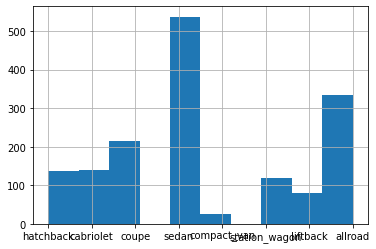

In [331]:
col_info(result.body_type)

In [829]:
result['name'] = result.name.apply(lambda x: x.replace(' MT', '').replace(' AT', '').replace(' AMT', '').replace(' Model', '').replace(' Base', '').replace(' Line', '').replace(' Базовая', ''))

In [606]:
result.sample(25)

,name,weight,page_title,dimensions_length,dimensions_width,dimensions_height,model_date_begin,body_type,series
1315,30d xDrive M Sport,1895,"X3 2017, джип_suv 5 дв., 3 поколение, G01",4708,1891,1676,2017,allroad,X3
224,M235i xDrive,1600,"2-Series 2014, купе, 1 поколение, F22",4432,1774,1418,2014,coupe,2ER
323,320i xDrive,1650,"3-Series 2012, универсал, 6 поколение, F30",4624,1811,1429,2012,station_wagon,3ER
327,328i xDrive,1685,"3-Series 2012, универсал, 6 поколение, F30",4624,1811,1429,2012,station_wagon,3ER
688,525d,1780,"5-Series 2009, седан, 6 поколение, F10",4899,1860,1464,2009,sedan,5ER
566,420i,1580,"4-Series 2014, седан, 1 поколение, F36",4638,1825,1389,2014,sedan,4ER
1162,3.0 Competition,1570,"M4 рестайлинг 2017, купе, 1 поколение, F82",4638,1825,1392,2017,coupe,4ER
724,530i xDrive,1800,"5-Series рестайлинг 2007, универсал, 5 поколен...",4843,1846,1491,2007,station_wagon,5ER
125,120d,1585,"1-Series рестайлинг 2008, открытый кузов, 1 по...",4360,1748,1411,2008,cabriolet,1ER
166,123d,1495,"1-Series рестайлинг 2007, хэтчбек 5 дв., 1 пок...",4239,1748,1421,2007,hatchback,1ER


In [830]:
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 18d', '18d sDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 2.0d', '2.0d xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 35i', '35i sDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 3.0i Luxury', '3.0i xDrive Luxury'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 40e', '40e xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 2.5i', '2.5i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 35i', '35i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive30d', '30d xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive30d Exclusive', '30d xDrive Exclusive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 48i Luxury', '48i xDrive Luxury'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 18d', '18d xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 30i', '30i sDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 18d Advantage', '18d xDrive Advantage'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 25d', '25d xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 4.4 M', '4.4 xDrive M'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 18d Sport', '18d xDrive Sport'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 2.0i', '2.0i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive40i', '40i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 20i', '20i sDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 18d xLine', '18d xLine xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 50i', '50i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 23i', '23i sDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 25i', '25i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive40i M Sport Plus', '40i xDrive M Sport Plus'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 30i', '30i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 28i', '28i sDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 23d', '23d xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 48i Sport', '48i xDrive Sport'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 40i', '40i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive30d M Sport Plus', '30d xDrive M Sport Plus'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 40i M Sport Pro', '40i xDrive M Sport Pro'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 18d Advantage Plus', '18d xDrive Advantage Plus'))
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 35is', '35is sDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 25i M Sport', '25i xDrive M Sport'))
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 18i', '18i sDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 50i M Sports Edition', '50i xDrive M Sports Edition'))
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 18i Advantage', '18i sDrive Advantage'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive M50i', 'M50i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 20i', '20i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 3.0d Business', '3.0d xDrive Business'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive M40i', 'M40i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 20i', '20i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('M50i xDrive', 'M50i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive M40i M Special', 'M40i xDrive M Special'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 20i Advantage', '20i xDrive Advantage'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive40i Exclusive', '40i xDrive Exclusive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 3.0i Business', '3.0i xDrive Business'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 28i', '28i xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 20i DCT', '20i sDrive DCT'))
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 18i SAT', '18i sDrive SAT'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 25i Sport', '25i Sport xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive M50d', 'M50d xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 30d', '30d xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 20i Urban', '20i xDrive Urban'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 20i xLine', '20i xDrive xLine'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 35d', '35d xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 25d Business', '25d xDrive Business'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 20i Business', '20i xDrive Business'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 40d', '40d xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('sDrive 30i M Sport Pro', '30i sDrive M Sport Pro'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 20i M Sport', '20i xDrive M Sport'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 20d', '20d xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 18d M Sport', '18d xDrive M Sport'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 30d M Sport', '30d xDrive M Sport'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive M40d', 'M40d xDrive'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive40i M Sport Pure', '40i xDrive M Sport Pure'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive40i M Sport Pure', '40i xDrive M Sport Pure'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive 20i DCT M Sport', '20i xDrive DCT M Sport'))
result['name'] = result['name'].apply(lambda x: x.replace('xDrive M50d M Special by Individual', 'M50d xDrive M Special by Individual'))

In [831]:
page_title_tmp = result['page_title'].str.split(" ", expand = True) 

In [346]:
page_title_tmp.sample(15)

,0,1,2,3,4,5,6,7,8,9,10
1564,Z4,рестайлинг,"2013,",открытый,"кузов,",2,"поколение,",E89,None,None,None
273,3-Series,"2018,","седан,",7,"поколение,",G20,None,None,None,None,None
1177,M5,"2017,","седан,",6,"поколение,",F90,None,None,None,None,None
240,2-Series,Active,Tourer,"2014,",хэтчбек,5,"дв.,",1,"поколение,",F45,None
720,5-Series,рестайлинг,"2007,","универсал,",5,"поколение,",E61,None,None,None,None
772,5-Series,"2004,","универсал,",5,"поколение,",E61,None,None,None,None,None
998,7-Series,рестайлинг,"2019,","седан,",6,"поколение,","G11,",G12,None,None,None
751,5-Series,рестайлинг,"2007,","седан,",5,"поколение,",E60,None,None,None,None
905,6-Series,"2012,","седан,",3,"поколение,",F06,None,None,None,None,None
662,5-Series,"2010,","универсал,",6,"поколение,",F11,None,None,None,None,None


In [832]:
result['series'] = page_title_tmp[0]

Количество пропусков: 0
count     1554
unique      21
top        5ER
freq       311
Name: series, dtype: object,
Распределение:
5ER    311
3ER    262
1ER    155
7ER    119
6ER    102
2ER    102
X1      82
4ER     76
X5      71
X3      66
X6      49
Z4      35
8ER     32
X4      28
X2      20
X7      19
Z3      17
I3       3
I8       3
Z8       1
Z1       1
Name: series, dtype: int64,


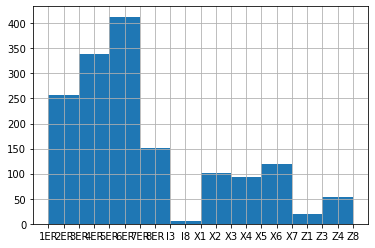

In [846]:
col_info(result.series)

In [833]:
dic_model = {
    '1-Series': '1ER',
    '1M': '1ER',
    '2ACTIVETOURER': '2ER',
    '2-Series': '2ER',
    '2': '2ER',
    '2GRANDTOURER': '2ER',
    '3-Series': '3ER',
    '4': '4ER',
    '4-Series': '4ER',
    '5-Series': '5ER',
    '6-Series': '6ER',
    '7-Series': '7ER',
    '8-Series': '8ER',
    'i8': 'I8',
    'i3': 'I3',
    'M2': '2ER',
    'M3': '3ER',
    'M4': '4ER',
    'M5': '5ER',
    'M6': '6ER',
    'M8': '8ER',
    'X1': 'X1',
    'X2': 'X2',
    'X3': 'X3',
    'X3_M': 'X3',
    'X4': 'X4',
    'X4_M': 'X4',
    'X5': 'X5',
    'X5_M': 'X5',
    'X6': 'X6',
    'X6_M': 'X6',
    'X7': 'X7',
    'Z1': 'Z1',
    'Z3': 'Z3',
    'Z3_M': 'Z3',
    'Z4': 'Z4',
    'Z4_M': 'Z4',
    'Z8': 'Z8',
    'E3': 'E3',
    'E9': 'E9',
    '326': '326',
    '321': '321',
    '340': '340',
}

In [834]:
result['series'] = result['series'].map(dic_model)

In [835]:
result.drop(['page_title'], axis=1, inplace=True,)

In [836]:
result['model_date_begin'] = result['model_date_begin'].astype(int)

In [837]:
result = result[result['model_date_begin'] > 1975]

In [796]:
result

,name,weight,dimensions_length,dimensions_width,dimensions_height,model_date_begin,body_type,series
20,M140i,1510,4329,1765,1430,2017,hatchback,1ER
21,118i,1380,4329,1765,1440,2017,hatchback,1ER
22,118i Sport,1380,4329,1765,1440,2017,hatchback,1ER
23,118i Urban,1380,4329,1765,1440,2017,hatchback,1ER
24,118i М Sport,1380,4329,1765,1440,2017,hatchback,1ER
...,...,...,...,...,...,...,...,...
1584,3.2i M,1495,4113,1781,1271,2006,coupe,Z4
1585,2.0i,1295,4091,1781,1299,2002,cabriolet,Z4
1586,2.5i,1335,4091,1781,1299,2002,cabriolet,Z4
1587,3.0i,1365,4091,1781,1299,2002,cabriolet,Z4


In [869]:
result.drop(['series'], axis=1, inplace=True,)

In [838]:
result.to_csv('output/car_new_features.csv', index=False)  

In [870]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1554 entries, 20 to 1588
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1554 non-null   object
 1   weight             1554 non-null   int64 
 2   dimensions_length  1554 non-null   int32 
 3   dimensions_width   1554 non-null   int32 
 4   dimensions_height  1554 non-null   int32 
 5   model_date_begin   1554 non-null   int32 
 6   body_type          1554 non-null   object
dtypes: int32(4), int64(1), object(2)
memory usage: 72.8+ KB


In [840]:
car_new_features = result.copy()

In [878]:
new_big_df = pd.read_csv('output/new_big_df.csv')

In [879]:
new_big_df

,body_type,color,fuel_type,model_date_begin,name,number_of_doors,production_date,vehicle_transmission,engine_displacement,engine_power,...,360-camera,wireless-charger,electronic-gage-panel,model_age,covid,price,dataset,luxury_tax,car_tax,equipments_count
0,hatchback,black,gasoline,2007,130i,5,2007,AT,3000,265,...,0,0,0,13,1,591500,train,1.0,34980,2
1,cabriolet,red,gasoline,2007,120i,2,2009,AT,2000,156,...,0,0,0,13,1,1046500,train,1.0,6552,0
2,hatchback,olive,gasoline,2004,118i,5,2006,AT,2000,129,...,0,0,0,16,1,500500,train,1.0,3096,9
3,hatchback,black,gasoline,2011,116i,5,2013,AT,1600,136,...,0,0,0,9,1,599690,train,1.0,3264,8
4,hatchback,mid_blue,gasoline,2011,118i,5,2012,AT,1600,170,...,0,0,0,9,1,726180,train,1.0,7140,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21791,sedan,black,gasoline,2013,520i,4,2013,AT,2000,184,...,0,0,0,7,0,0,test,1.0,7912,13
21792,allroad,black,diesel,2013,30d,5,2016,AT,3000,249,...,0,0,0,7,0,0,test,1.0,16932,18
21793,sedan,black,gasoline,2002,525xi,4,2006,AT,2500,218,...,0,0,1,18,0,0,test,1.0,12644,6
21794,sedan,brown,gasoline,2009,528i xDrive,4,2012,AT,2000,245,...,0,0,0,11,0,0,test,1.0,16660,13


In [871]:
on = ['name', 'model_date_begin', 'body_type']

car_new_features[car_new_features.duplicated(subset=on)].sort_values(on)

,name,weight,dimensions_length,dimensions_width,dimensions_height,model_date_begin,body_type,series
1385,20d xDrive,1815,4671,1881,1624,2014,allroad,X4
1307,20d xDrive,1825,4708,1891,1676,2017,allroad,X3
1309,20d xDrive M Sport,1825,4708,1891,1676,2017,allroad,X3
1383,20i xDrive M Sport,1815,4671,1881,1624,2014,allroad,X4
1386,28i xDrive,1815,4671,1881,1624,2014,allroad,X4
1387,28i xDrive Exclusive,1815,4671,1881,1624,2014,allroad,X4
1442,30d xDrive,2075,4857,1933,1766,2010,allroad,X5
1392,30d xDrive,1900,4671,1881,1624,2014,allroad,X4
1491,30d xDrive,2140,4909,1989,1702,2014,allroad,X6
1401,30d xDrive,2185,4922,2004,1745,2018,allroad,X5


In [872]:
car_new_features = car_new_features.drop_duplicates(subset=on, keep='first')

In [873]:
car_new_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136 entries, 20 to 1588
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1136 non-null   object
 1   weight             1136 non-null   int64 
 2   dimensions_length  1136 non-null   int32 
 3   dimensions_width   1136 non-null   int32 
 4   dimensions_height  1136 non-null   int32 
 5   model_date_begin   1136 non-null   int32 
 6   body_type          1136 non-null   object
 7   series             1136 non-null   object
dtypes: int32(4), int64(1), object(3)
memory usage: 62.1+ KB


In [740]:
new_big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21292 entries, 0 to 21570
Data columns (total 64 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   body_type                     21292 non-null  object 
 1   color                         21292 non-null  object 
 2   fuel_type                     21292 non-null  object 
 3   model_date_begin              21292 non-null  int64  
 4   name                          21292 non-null  object 
 5   series                        9599 non-null   object 
 6   number_of_doors               21292 non-null  int64  
 7   production_date               21292 non-null  int64  
 8   vehicle_transmission          21292 non-null  object 
 9   engine_displacement           21292 non-null  int64  
 10  engine_power                  21292 non-null  int64  
 11  mileage                       21292 non-null  int64  
 12  gear_type                     21292 non-null  object 
 13  s

In [848]:
dic_model = {
    '1ER': '1ER',
    '2ER': '2ER',
    '3ER': '3ER',
    '4': '4ER',
    '4ER': '4ER',
    '5ER': '5ER',
    '6ER': '6ER',
    '7ER': '7ER',
    '8ER': '8ER',
    'I8': 'I8',
    'I3': 'I3',
    'X1': 'X1',
    'X2': 'X2',
    'X3': 'X3',
    'X3_M': 'X3',
    'X4': 'X4',
    'X4_M': 'X4',
    'X5': 'X5',
    'X5_M': 'X5',
    'X6': 'X6',
    'X6_M': 'X6',
    'X7': 'X7',
    'Z1': 'Z1',
    'Z3': 'Z3',
    'Z3_M': 'Z3',
    'Z4': 'Z4',
    'Z4_M': 'Z4',
    'Z8': 'Z8',
    'E3': 'E3',
    'E9': 'E9',
    '326': '326',
    '321': '321',
    '340': '340',
    'M2': '2ER',
    'M3': '3ER',
    'M4': '4ER',
    'M5': '5ER',
    'M6': '6ER',
    'M8': '8ER',
}

In [849]:
new_big_df['series'] = new_big_df['series'].map(dic_model)

In [877]:
new_big_df

,model_date_begin,number_of_doors,production_date,engine_displacement,engine_power,owners,exp_year,high-beam-assist,front-seats-heat-vent,bluetooth,...,model_age_5,model_age_6,model_age_7,model_age_8,model_age_9,covid_0,covid_1,luxury_tax_1.0,luxury_tax_1.1,luxury_tax_2.0
0,2007,5,2007,3000,265,3,5,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,2007,2,2009,2000,156,3,2,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,2004,5,2006,2000,129,2,9,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2011,5,2013,1600,136,3,7,0,0,1,...,0,0,0,0,1,0,1,1,0,0
4,2011,5,2012,1600,170,1,6,0,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21791,2013,4,2013,2000,184,3,5,1,0,1,...,0,0,1,0,0,1,0,1,0,0
21792,2013,5,2016,3000,249,1,9,1,1,1,...,0,0,1,0,0,1,0,1,0,0
21793,2002,4,2006,2500,218,3,10,0,0,0,...,0,0,0,0,0,1,0,1,0,0
21794,2009,4,2012,2000,245,3,8,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [883]:
# добавлю в большой датасет данные из меньшего
on = ['name', 'model_date_begin', 'body_type']
full = new_big_df.merge(car_new_features.drop_duplicates(subset=on), how='left', on=on)
# full = new_big_df.merge(car_new_features, how='left', on=on)

In [884]:
full

,body_type,color,fuel_type,model_date_begin,name,number_of_doors,production_date,vehicle_transmission,engine_displacement,engine_power,...,price,dataset,luxury_tax,car_tax,equipments_count,weight,dimensions_length,dimensions_width,dimensions_height,series
0,hatchback,black,gasoline,2007,130i,5,2007,AT,3000,265,...,591500,train,1.0,34980,2,1450.0,4239.0,1748.0,1421.0,1ER
1,cabriolet,red,gasoline,2007,120i,2,2009,AT,2000,156,...,1046500,train,1.0,6552,0,NaN,NaN,NaN,NaN,NaN
2,hatchback,olive,gasoline,2004,118i,5,2006,AT,2000,129,...,500500,train,1.0,3096,9,1325.0,4227.0,1751.0,1430.0,1ER
3,hatchback,black,gasoline,2011,116i,5,2013,AT,1600,136,...,599690,train,1.0,3264,8,1365.0,4324.0,1765.0,1462.0,1ER
4,hatchback,mid_blue,gasoline,2011,118i,5,2012,AT,1600,170,...,726180,train,1.0,7140,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21791,sedan,black,gasoline,2013,520i,4,2013,AT,2000,184,...,0,test,1.0,7912,13,1670.0,4899.0,1860.0,1464.0,5ER
21792,allroad,black,diesel,2013,30d,5,2016,AT,3000,249,...,0,test,1.0,16932,18,NaN,NaN,NaN,NaN,NaN
21793,sedan,black,gasoline,2002,525xi,4,2006,AT,2500,218,...,0,test,1.0,12644,6,NaN,NaN,NaN,NaN,NaN
21794,sedan,brown,gasoline,2009,528i xDrive,4,2012,AT,2000,245,...,0,test,1.0,16660,13,1780.0,4899.0,1860.0,1464.0,5ER


In [918]:
full_hasnt_weight = full[full['weight'].isnull() == True]
ff = full_hasnt_weight[['name', 'production_date', 'body_type']].groupby(['name','production_date','body_type']).agg({'body_type': 'sum'}).sort_values(by=['name'])
ff = pd.DataFrame(ff)
df = pd.DataFrame(full_hasnt_weight[['name', 'production_date', 'body_type']].groupby(['name','production_date','body_type']).size(),columns=['name'])
df
df.to_excel('output/full_hasnt_weight.xlsx')  

In [885]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21796 entries, 0 to 21795
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   body_type                     21796 non-null  object 
 1   color                         21796 non-null  object 
 2   fuel_type                     21796 non-null  object 
 3   model_date_begin              21796 non-null  int64  
 4   name                          21796 non-null  object 
 5   number_of_doors               21796 non-null  int64  
 6   production_date               21796 non-null  int64  
 7   vehicle_transmission          21796 non-null  object 
 8   engine_displacement           21796 non-null  int64  
 9   engine_power                  21796 non-null  int64  
 10  mileage                       21796 non-null  int64  
 11  gear_type                     21796 non-null  object 
 12  steering_wheel                21796 non-null  object 
 13  o

In [1065]:
sheet_to_df_map2 = pd.read_excel('output/drivernotes_cars_tehnicheskie_harakteristiki.xlsx', sheet_name=None)
mdf2 = pd.concat(sheet_to_df_map2, axis=0, ignore_index=True)
mdf2.drop(['Unnamed: 0'], axis=1, inplace=True,)

In [1066]:
mdf2

,name,acceleration_time_to_100_km_h,dimensions_height,payload,dimensions_length,number_of_cylinders,wheelbase,curb_weight,dimensions_width
0,(БМВ 1 series) 116i AT 2011-2015,8.7 сек,1421 мм,455 кг,4324 мм,4.0,2690 мм,1380 кг,1765 мм
1,(БМВ 1 series) 118i AT 2011-2015,7.2 сек,1421 мм,530 кг,4324 мм,4.0,2690 мм,1315 кг,1765 мм
2,(БМВ 1 series) 116i MT 2011-2015,8.5 сек,1421 мм,455 кг,4324 мм,4.0,2690 мм,1360 кг,1765 мм
3,(БМВ 1 series) 114d MT 2011-2015,12.2 сек,1421 мм,530 кг,4324 мм,4.0,2690 мм,1390 кг,1765 мм
4,(БМВ 1 series) 114i MT 2011-2015,11.2 сек,1421 мм,530 кг,4324 мм,4.0,2690 мм,1370 кг,1765 мм
...,...,...,...,...,...,...,...,...,...
2304,З4) sDrive20i MT 2009-2015,6.9 сек,1291 мм,330 кг,4239 мм,4.0,2496 мм,1470 кг,1790 мм
2305,З4) sDrive18i MT 2009-2015,7.9 сек,1291 мм,330 кг,4239 мм,4.0,2496 мм,1470 кг,1790 мм
2306,З4) sDrive28i MT 2009-2015,5.7 сек,1291 мм,330 кг,4239 мм,4.0,2496 мм,1475 кг,1790 мм
2307,З4) sDrive23i AT 2009-2015,7.3 сек,1291 мм,330 кг,4239 мм,6.0,2496 мм,1505 кг,1790 мм


In [1079]:
sheet_to_df_map3 = pd.read_excel('output/drivernotes_cars_tehnicheskie_harakteristiki2.xlsx', sheet_name=None)
mdf3 = pd.concat(sheet_to_df_map3, axis=0, ignore_index=True)
mdf3.drop(['Unnamed: 0'], axis=1, inplace=True,)

In [1080]:
mdf3

,name,acceleration_time_to_100_km_h,dimensions_height,payload,dimensions_length,number_of_cylinders,wheelbase,curb_weight,dimensions_width
0,З4) 2.2i AT 2002-2005,8.3 сек,1299 мм,300 кг,4091 мм,6.0,2495 мм,1360 кг,1781 мм
1,З4) 2.2i MT 2002-2005,7.7 сек,1299 мм,300 кг,4091 мм,6.0,2495 мм,1325 кг,1781 мм
2,З4) 2.5i AT 2002-2005,7.5 сек,1299 мм,300 кг,4091 мм,6.0,2495 мм,1365 кг,1781 мм
3,З4) 2.5i MT 2002-2005,7 сек,1299 мм,300 кг,4091 мм,6.0,2495 мм,1335 кг,1781 мм
4,З4) 3.0i AT 2002-2005,6.2 сек,1299 мм,300 кг,4091 мм,6.0,2495 мм,1385 кг,1781 мм
5,З4) 3.0i MT 2002-2005,5.9 сек,1299 мм,300 кг,4091 мм,6.0,2495 мм,1365 кг,1781 мм
6,З4) sDrive20i AT 2009-2015,6.9 сек,1291 мм,330 кг,4239 мм,4.0,2496 мм,1420 кг,1790 мм
7,З4) sDrive28i AT 2009-2015,5.5 сек,1291 мм,330 кг,4239 мм,4.0,2496 мм,1420 кг,1790 мм
8,З4) sDrive20i AT 2009-2015,7.2 сек,1291 мм,330 кг,4239 мм,4.0,2496 мм,1495 кг,1790 мм
9,З4) sDrive18i AT 2009-2015,8.1 сек,1291 мм,330 кг,4239 мм,4.0,2496 мм,1495 кг,1790 мм


In [1083]:
result2 = mdf2.append(mdf3)

In [1090]:
result2.reset_index(drop=True, inplace=True)

In [1290]:
result2_cleared = pd.read_csv('output/result3_cleared.csv', encoding = 'ISO-8859-1', sep=';')

In [1291]:
result2_cleared.drop(['Unnamed: 0'], axis=1, inplace=True,)

In [1292]:
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 18d', '18d sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 2.0d', '2.0d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 35i', '35i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 3.0i Luxury', '3.0i xDrive Luxury'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 40e', '40e xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 2.5i', '2.5i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 35i', '35i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive30d', '30d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive30d Exclusive', '30d xDrive Exclusive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 48i Luxury', '48i xDrive Luxury'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 18d', '18d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 30i', '30i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 18d Advantage', '18d xDrive Advantage'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 25d', '25d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 4.4 M', '4.4 xDrive M'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 18d Sport', '18d xDrive Sport'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 2.0i', '2.0i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive40i', '40i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 20i', '20i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 18d xLine', '18d xLine xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 50i', '50i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 23i', '23i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 25i', '25i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive40i M Sport Plus', '40i xDrive M Sport Plus'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 30i', '30i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 28i', '28i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 23d', '23d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 48i Sport', '48i xDrive Sport'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 40i', '40i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive30d M Sport Plus', '30d xDrive M Sport Plus'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 40i M Sport Pro', '40i xDrive M Sport Pro'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 18d Advantage Plus', '18d xDrive Advantage Plus'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 35is', '35is sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 25i M Sport', '25i xDrive M Sport'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 18i', '18i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 50i M Sports Edition', '50i xDrive M Sports Edition'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 18i Advantage', '18i sDrive Advantage'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive M50i', 'M50i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 20i', '20i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 3.0d Business', '3.0d xDrive Business'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive M40i', 'M40i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 20i', '20i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('M50i xDrive', 'M50i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive M40i M Special', 'M40i xDrive M Special'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 20i Advantage', '20i xDrive Advantage'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive40i Exclusive', '40i xDrive Exclusive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 3.0i Business', '3.0i xDrive Business'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 28i', '28i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 20i DCT', '20i sDrive DCT'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 18i SAT', '18i sDrive SAT'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 25i Sport', '25i Sport xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive M50d', 'M50d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 30d', '30d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 20i Urban', '20i xDrive Urban'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 20i xLine', '20i xDrive xLine'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 35d', '35d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 25d Business', '25d xDrive Business'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 20i Business', '20i xDrive Business'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 40d', '40d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive 30i M Sport Pro', '30i sDrive M Sport Pro'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 20i M Sport', '20i xDrive M Sport'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 20d', '20d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 18d M Sport', '18d xDrive M Sport'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 30d M Sport', '30d xDrive M Sport'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive M40d', 'M40d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive40i M Sport Pure', '40i xDrive M Sport Pure'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive40i M Sport Pure', '40i xDrive M Sport Pure'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive 20i DCT M Sport', '20i xDrive DCT M Sport'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive20i', '20i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive20i', '20i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive20d', '20d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive20d', '20d sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive25d', '25d sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive23d', '23d sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive23d', '23d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive16d', '16d sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive28i', '28i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive18d', '18d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive25i', '25i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive28i', '28i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive18i', '18i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive18d', '18d sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive23i', '23i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive30i', '30i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive30i', '30i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive35i', '35i sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('sDrive35is', '35is sDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive50i', '50i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive35i', '35i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('35i sDrives', '35i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive35d', '35d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive25d', '25d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive40d', '40d xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDrive48i', '48i xDrive'))
result2_cleared['name'] = result2_cleared['name'].apply(lambda x: x.replace('xDriveM50d', 'M50d xDrive'))

In [1293]:
result2_cleared

,name,engine_power,max_spped,vehicle_transmission,model_date_begin,model_date_end,series,acceleration_time_to_100_km_h,dimensions_height,payload,dimensions_length,number_of_cylinders,wheelbase,curb_weight,dimensions_width,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,116i,136.0,210.0,AT,2011,2015,1ER,8.7,1421,455.0,4324,4.0,2690,1380,1765,NaN,NaN,NaN
1,118i,170.0,222.0,AT,2011,2015,1ER,7.2,1421,530.0,4324,4.0,2690,1315,1765,NaN,NaN,NaN
2,116i,136.0,210.0,MT,2011,2015,1ER,8.5,1421,455.0,4324,4.0,2690,1360,1765,NaN,NaN,NaN
3,114d,95.0,185.0,MT,2011,2015,1ER,12.2,1421,530.0,4324,4.0,2690,1390,1765,NaN,NaN,NaN
4,114i,102.0,195.0,MT,2011,2015,1ER,11.2,1421,530.0,4324,4.0,2690,1370,1765,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,3.2,343.0,250.0,MT,2006,2008,Z4,5.0,1287,310.0,4113,6.0,2497,1495,1781,NaN,NaN,NaN
2339,3.2,335.0,250.0,MT,2006,2008,Z4,5.1,1287,265.0,4113,6.0,2497,1465,1781,NaN,NaN,NaN
2340,3.2,343.0,250.0,MT,2006,2008,Z4,5.0,1302,295.0,4113,6.0,2497,1485,1781,NaN,NaN,NaN
2341,3.2,335.0,250.0,MT,2006,2008,Z4,5.1,1316,280.0,4113,6.0,2497,1453,1781,NaN,NaN,NaN


In [1181]:
result2_cleared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           2343 non-null   object 
 1   engine_power                   2343 non-null   float64
 2   max_spped                      2343 non-null   float64
 3   vehicle_transmission           2343 non-null   object 
 4   model_date_begin               2343 non-null   int64  
 5   model_date_end                 2343 non-null   int64  
 6   series                         2343 non-null   object 
 7   acceleration_time_to_100_km_h  2343 non-null   float64
 8   dimensions_height              2343 non-null   int64  
 9   payload                        2343 non-null   float64
 10  dimensions_length              2343 non-null   int64  
 11  number_of_cylinders            2343 non-null   float64
 12  wheelbase                      2343 non-null   i

In [1294]:
result2_cleared['acceleration_time_to_100_km_h'] = result2_cleared['acceleration_time_to_100_km_h'].fillna(result2_cleared['acceleration_time_to_100_km_h'].mean())

In [1295]:
result2_cleared['engine_power'] = result2_cleared['engine_power'].fillna(result2_cleared['engine_power'].mean())

In [1296]:
result2_cleared['max_spped'] = result2_cleared['max_spped'].fillna(result2_cleared['max_spped'].mean())

In [1297]:
result2_cleared['vehicle_transmission'] = result2_cleared['vehicle_transmission'].fillna(result2_cleared['vehicle_transmission'].mode()[0])

In [1298]:
result2_cleared['number_of_cylinders'] = result2_cleared['number_of_cylinders'].fillna(result2_cleared['number_of_cylinders'].mode()[0])

In [1299]:
result2_cleared['payload'] = result2_cleared['payload'].fillna(result2_cleared['payload'].mode()[0])

Количество пропусков: 0
count    2343.000000
mean     1783.957320
std        72.166065
min      1610.000000
25%      1740.000000
50%      1782.000000
75%      1845.500000
max      2010.000000
Name: dimensions_width, dtype: float64,
Распределение:
1817    234
1748    196
1645    174
1782    149
1846    136
1739    129
1860    122
1800    114
1751     97
1811     68
1757     64
1902     58
1698     57
1853     49
1855     46
1710     45
1798     45
1765     44
1700     44
1725     43
1825     38
1862     34
1690     32
1781     31
1881     29
1790     29
1740     27
1610     25
1901     23
1845     21
1894     19
1828     14
1983     14
1968     12
1933     11
1872     10
1680      8
1938      7
1707      7
1774      6
1780      5
1870      4
1692      3
1877      2
1925      2
1899      2
1891      2
1775      2
1976      2
1804      2
1803      1
1801      1
2010      1
1824      1
1830      1
1942      1
Name: dimensions_width, dtype: int64,


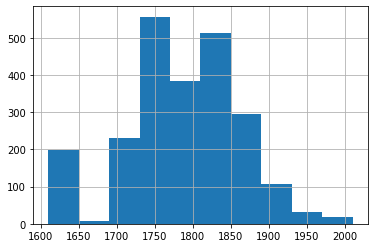

In [1178]:
col_info(result2_cleared.dimensions_width)

In [1300]:
result2_cleared = result2_cleared.rename(columns={'max_spped': 'max_speed'})

In [1301]:
result2_cleared.drop(['Unnamed: 16'], axis=1, inplace=True,)
result2_cleared.drop(['Unnamed: 17'], axis=1, inplace=True,)
result2_cleared.drop(['Unnamed: 18'], axis=1, inplace=True,)
# result2_cleared.drop(['series'], axis=1, inplace=True,)
# result2_cleared.drop(['engine_power'], axis=1, inplace=True,)
# result2_cleared.drop(['vehicle_transmission'], axis=1, inplace=True,)
# result2_cleared.drop(['max_speed'], axis=1, inplace=True,)
# result2_cleared.drop(['model_date_end'], axis=1, inplace=True,)
# result2_cleared.drop(['acceleration_time_to_100_km_h'], axis=1, inplace=True,)
# result2_cleared.drop(['number_of_cylinders'], axis=1, inplace=True,)

In [1302]:
result2_cleared

,name,engine_power,max_speed,vehicle_transmission,model_date_begin,model_date_end,series,acceleration_time_to_100_km_h,dimensions_height,payload,dimensions_length,number_of_cylinders,wheelbase,curb_weight,dimensions_width
0,116i,136.0,210.0,AT,2011,2015,1ER,8.7,1421,455.0,4324,4.0,2690,1380,1765
1,118i,170.0,222.0,AT,2011,2015,1ER,7.2,1421,530.0,4324,4.0,2690,1315,1765
2,116i,136.0,210.0,MT,2011,2015,1ER,8.5,1421,455.0,4324,4.0,2690,1360,1765
3,114d,95.0,185.0,MT,2011,2015,1ER,12.2,1421,530.0,4324,4.0,2690,1390,1765
4,114i,102.0,195.0,MT,2011,2015,1ER,11.2,1421,530.0,4324,4.0,2690,1370,1765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338,3.2,343.0,250.0,MT,2006,2008,Z4,5.0,1287,310.0,4113,6.0,2497,1495,1781
2339,3.2,335.0,250.0,MT,2006,2008,Z4,5.1,1287,265.0,4113,6.0,2497,1465,1781
2340,3.2,343.0,250.0,MT,2006,2008,Z4,5.0,1302,295.0,4113,6.0,2497,1485,1781
2341,3.2,335.0,250.0,MT,2006,2008,Z4,5.1,1316,280.0,4113,6.0,2497,1453,1781


In [1303]:
on = ['name', 'model_date_begin']

result2_cleared = result2_cleared[result2_cleared.duplicated(subset=on)].sort_values(on)

In [1304]:
result2_cleared

,name,engine_power,max_speed,vehicle_transmission,model_date_begin,model_date_end,series,acceleration_time_to_100_km_h,dimensions_height,payload,dimensions_length,number_of_cylinders,wheelbase,curb_weight,dimensions_width
2271,1.9,140.0,205.0,MT,1995,1999,Z3,9.5,1288,250.0,4025,4.0,2446,1275,1692
26,114d,95.0,185.0,MT,2011,2015,1ER,12.2,1421,530.0,4324,4.0,2690,1395,1765
25,114i,102.0,195.0,MT,2011,2015,1ER,11.2,1421,530.0,4324,4.0,2690,1375,1765
185,116d,115.0,200.0,MT,2007,2012,1ER,10.2,1421,525.0,4239,4.0,2660,1295,1748
230,116d,115.0,200.0,MT,2007,2012,1ER,10.3,1421,525.0,4239,4.0,2660,1305,1748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,M235i,326.0,250.0,??,2013,2014,2ER,5.0,1418,510.0,4432,6.0,2690,1455,1774
1507,M550d xDrive,381.0,250.0,AT,2009,2013,5ER,4.9,1462,580.0,4910,6.0,2968,2065,1860
1426,M550d xDrive,381.0,250.0,AT,2013,2015,5ER,4.9,1462,580.0,4910,6.0,2968,2065,1860
2082,M635CSi,260.0,242.0,MT,1983,1989,6ER,6.9,1354,350.0,4755,6.0,2625,1515,1725


In [1305]:
ff = result2_cleared[['name', 'model_date_begin', 'payload']].groupby(['name','model_date_begin']).agg({'payload': 'mean'}).sort_values(by=['name'])
ff = pd.DataFrame(ff)
ff.to_excel('output/name_model_date_begin_res.xlsx')  

In [1244]:
new_big_df.to_excel('output/new_big_df.xlsx')  

In [1250]:
new_big_df['name'].nunique()

172

In [1265]:
ff = new_big_df[['name', 'model_date_begin', 'engine_power']].groupby(['name','model_date_begin']).agg({'engine_power': 'mean'}).sort_values(by=['name'])
ff = pd.DataFrame(ff)
ff.to_excel('output/name_model_date_begin.xlsx')  

In [1242]:
# добавлю в большой датасет данные из меньшего
on = ['name', 'model_date_begin']
full = new_big_df.merge(result2_cleared.drop_duplicates(subset=on), how='left', on=on)
# full = new_big_df.merge(car_new_features, how='left', on=on)

In [1243]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21796 entries, 0 to 21795
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   body_type                     21796 non-null  object 
 1   color                         21796 non-null  object 
 2   fuel_type                     21796 non-null  object 
 3   model_date_begin              21796 non-null  int64  
 4   name                          21796 non-null  object 
 5   number_of_doors               21796 non-null  int64  
 6   production_date               21796 non-null  int64  
 7   vehicle_transmission          21796 non-null  object 
 8   engine_displacement           21796 non-null  int64  
 9   engine_power                  21796 non-null  int64  
 10  mileage                       21796 non-null  int64  
 11  gear_type                     21796 non-null  object 
 12  steering_wheel                21796 non-null  object 
 13  o

In [1306]:
new_big_df2 = pd.read_csv('output/new_big_df.csv')

In [1324]:
new_big_df2

,body_type,color,fuel_type,model_date_begin,name,series,number_of_doors,production_date,vehicle_transmission,engine_displacement,...,360-camera,wireless-charger,electronic-gage-panel,model_age,covid,price,dataset,luxury_tax,car_tax,equipments_count
0,hatchback,black,gasoline,2007,130i,1ER,5,2007,AT,3000,...,0,0,0,13,1,591500,train,1.0,34980,2
1,cabriolet,red,gasoline,2007,120i,1ER,2,2009,AT,2000,...,0,0,0,13,1,1046500,train,1.0,6552,0
2,hatchback,olive,gasoline,2004,118i,1ER,5,2006,AT,2000,...,0,0,0,16,1,500500,train,1.0,3096,9
3,hatchback,black,gasoline,2011,116i,1ER,5,2013,AT,1600,...,0,0,0,9,1,599690,train,1.0,3264,8
4,hatchback,mid_blue,gasoline,2011,118i,1ER,5,2012,AT,1600,...,0,0,0,9,1,726180,train,1.0,7140,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21791,sedan,black,gasoline,2013,520i,5ER,4,2013,AT,2000,...,0,0,0,7,0,0,test,1.0,7912,13
21792,allroad,black,diesel,2013,30d,X5,5,2016,AT,3000,...,0,0,0,7,0,0,test,1.0,16932,18
21793,sedan,black,gasoline,2002,525xi,5ER,4,2006,AT,2500,...,0,0,1,18,0,0,test,1.0,12644,6
21794,sedan,brown,gasoline,2009,528i xDrive,5ER,4,2012,AT,2000,...,0,0,0,11,0,0,test,1.0,16660,13


In [1325]:
# Мне нужно получить список уникальных названий автомобилей с годом, типом топлива, кузова и тд, чтобы найти для них дополнительные характеристики в интернете
new_big_df3 = new_big_df2[['body_type', 'series', 'fuel_type', 'model_date_begin', 'name', 'number_of_doors', 'engine_displacement', 'engine_power', 'vehicle_transmission', 'price']]
new_big_df4 = new_big_df3.groupby(['body_type', 'series', 'fuel_type', 'model_date_begin', 'name', 'number_of_doors', 'engine_displacement', 'engine_power', 'vehicle_transmission'], as_index=False) \
    .agg({'price': 'mean'}) \
    .sort_values(by=['series']) \
    .rename(columns = {'price': 'mean_price'})
new_big_df4 = new_big_df4[['series', 'name', 'model_date_begin', 'fuel_type', 'body_type', 'vehicle_transmission', 'number_of_doors', 'engine_displacement', 'engine_power', 'mean_price']]

new_big_df4.to_excel('output/new_big_df4.xlsx')

In [1326]:
new_big_df4

,series,name,model_date_begin,fuel_type,body_type,vehicle_transmission,number_of_doors,engine_displacement,engine_power,mean_price
418,1ER,118i,2007,gasoline,hatchback,MT,5,2000,136,4.117750e+05
419,1ER,118i,2007,gasoline,hatchback,MT,5,2000,143,3.458000e+05
417,1ER,118i,2007,gasoline,hatchback,AT,5,2000,136,3.601160e+05
416,1ER,118i,2007,gasoline,hatchback,AT,3,2000,136,3.016094e+05
415,1ER,116i,2007,gasoline,hatchback,AT,5,2000,122,4.186000e+05
...,...,...,...,...,...,...,...,...,...,...
388,Z4,CS,2014,gasoline,coupe,AMT,2,3000,460,0.000000e+00
387,Z4,3.0,2005,gasoline,coupe,MT,2,3000,265,6.916000e+05
386,Z4,3.0,2005,gasoline,coupe,AT,2,3000,265,8.404988e+05
533,Z4,20i,2009,gasoline,roadster,MT,2,2000,184,0.000000e+00
